# Download File

In [5]:
import requests

url = "https://www.berlin.de/sen/uvk/_assets/verkehr/verkehrsplanung/radverkehr/weitere-radinfrastruktur/zaehlstellen-und-fahrradbarometer/gesamtdatei-stundenwerte.xlsx"
response = requests.get(url)

with open("cycling_berlin_data.xlsx", "wb") as file:
    file.write(response.content)

In [7]:
import pandas as pd

xlsx = pd.ExcelFile("cycling_berlin_data.xlsx")
df_locations = xlsx.parse("Standortdaten")

columns = {
    'Zählstelle':'id',
    'Beschreibung - Fahrtrichtung': 'name',
    'Breitengrad': 'latitude',
    'Längengrad': 'longitude',
    'Installationsdatum': 'installation_date'
}

df_locations = df_locations.rename(columns=columns)

df_locations.head()

,id,name,latitude,longitude,installation_date
0,12-PA-SCH,Schwedter Steg,52.549071,13.400367,2012-03-01
1,02-MI-JAN-N,Jannowitzbrücke Nord,52.513932,13.417835,2015-04-01
2,02-MI-JAN-S,Jannowitzbrücke Süd,52.513943,13.417611,2015-04-01
3,13-CW-PRI,Prinzregentenstraße,52.488136,13.333120,2015-04-01
4,18-TS-YOR-O,Yorckstraße Ost,52.491938,13.373472,2015-04-01


In [8]:
import folium 
map = folium.Map(location=[52.52437, 13.41053], zoom_start=12)

for _, row in df_locations.iterrows():
    coordinates = [row['latitude'], row['longitude']]
    name = row['name'] + " - " + row['id']
    folium.Marker(location=coordinates, popup='Point', tooltip=name).add_to(map)

map

In [46]:
sheets = [sheet for sheet in xlsx.sheet_names if 'Jahresdatei' in sheet]

df = pd.DataFrame()

for sheet in sheets:
    df_sheet = xlsx.parse(sheet)
    df = pd.concat([df, df_sheet])

In [55]:
df.columns

Index(['02-MI-JAN-N 01.04.2015', '02-MI-JAN-S 01.04.2015',
       '03-MI-SAN-O 01.06.2015', '03-MI-SAN-W 01.06.2015',
       '05-FK-OBB-O 01.06.2015', '05-FK-OBB-W 01.06.2015',
       '06-FK-FRA-O 01.06.2016', '06-FK-FRA-W 01.06.2016',
       '10-PA-BER-N 01.05.2016', '10-PA-BER-S 01.05.2016',
       '12-PA-SCH 01.03.2012', '13-CW-PRI 01.04.2015',
       '15-SP-KLO-N 01.06.2016', '15-SP-KLO-S 01.06.2016',
       '17-SZ-BRE-O 01.05.2016', '17-SZ-BRE-W 01.05.2016',
       '18-TS-YOR-O 01.04.2015', '18-TS-YOR-W 01.04.2015',
       '19-TS-MON 01.05.2015', '20-TS-MAR-N  01.05.2016',
       '20-TS-MAR-S 01.05.2016', '21-NK-MAY 01.05.2016',
       '23-TK-KAI 01.05.2016', '24-MH-ALB 01.07.2015', '26-LI-PUP 01.06.2015',
       '27-RE-MAR 01.05.2015', '14-CW-JU-O 27.07.2021',
       '14-CW-JU-W 27.07.2021', '02-MI-AL-W 16.12.2021',
       '02-PA-SE-N\n06.10.2022', '01-MI-AL-W 16.12.2021',
       '03-SP-NO-O 22.11.2023', '03-SP-NO-W 22.11.2023',
       '04-MI-NO\n16.10.2023', '11-PA-SE-N\n06.10.2

In [47]:
df = df.set_index('Zählstelle        Inbetriebnahme')
df.index = df.index.rename(None)

df_monthly = df[(df.index.year == 2023) & (df.index.month == 1)]

In [51]:
df_monthly = df.resample('ME').sum()

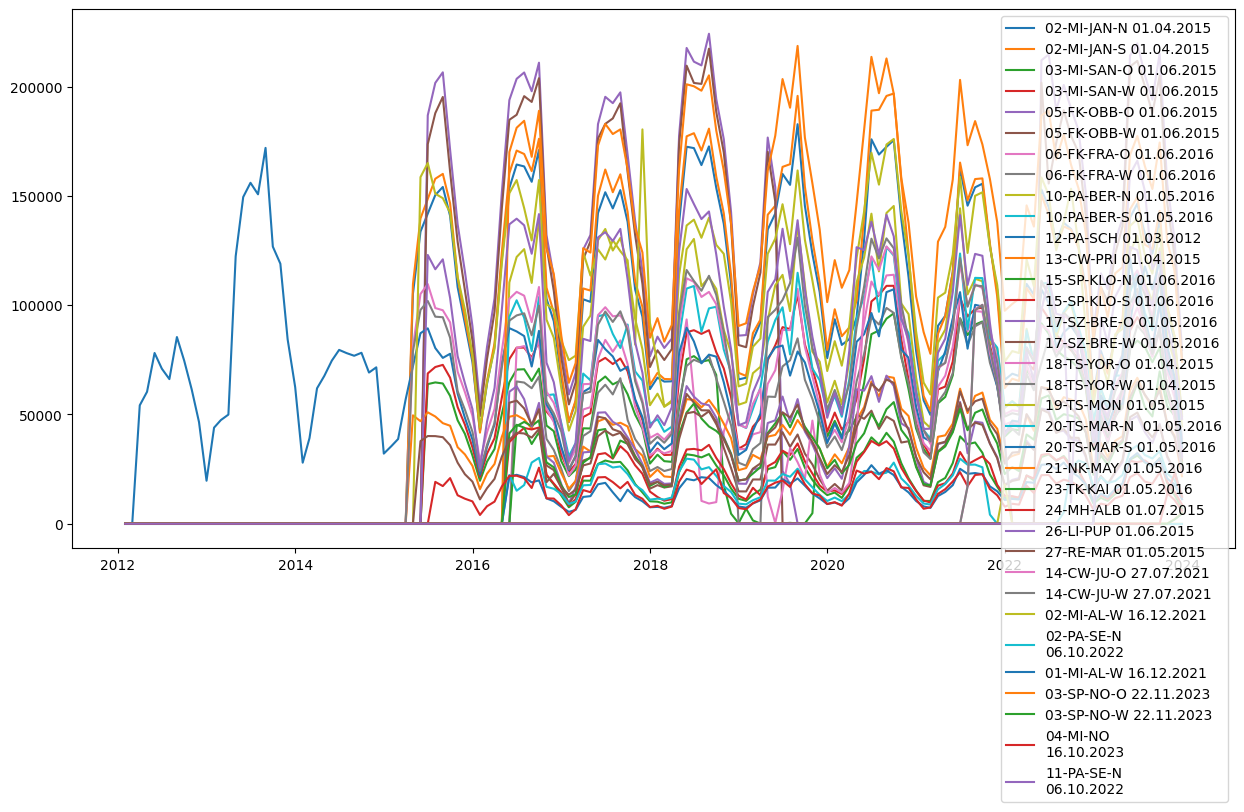

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))

for col in df_monthly.columns:
    ax.plot(df_monthly.index, df_monthly[col], label=col, linestyle='-')

plt.legend()
plt.show()

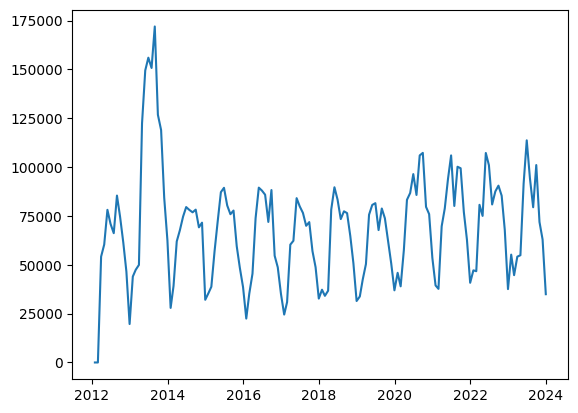

In [58]:
plt.plot(df_monthly.index, df_monthly['12-PA-SCH 01.03.2012'])